## Business Problem

The business problem is to create a recommendation system for workout tracks based on users' preferred intensity levels. Using audio features like energy, loudness, valence, and tempo, the system will categorize tracks into low, medium, and high intensity levels, enhancing user engagement and satisfaction during workouts.


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Additional imports for machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


## Data Preprocessing and EDA

In [6]:
# Import dataset into dataframe df
file_path = "C:/Users/welcome/Desktop/advanced_programming_assignment2/spotify_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Summary statistics of numerical features
print(df.describe())

# Information about the dataset including data types and missing values
print(df.info())

   Sr_no                track_id                 artists  \
0      0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1      1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2      2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3      3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4      4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love 

In [7]:
#show missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Check for missing values
print(df.isnull().sum())

# Drop any rows with missing values
df.dropna(inplace=True)

Missing values in each column:
Sr_no               0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
Sr_no               0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [8]:
# Encoding of categorical columns

# Display first few rows of the dataset
print(df.head())

# Define categorical features
categorical_features = ['explicit', 'track_genre']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical features to numeric using Label Encoding
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])
    
# Display first few rows of the dataset after encoding
print(df.head())

   Sr_no                track_id                 artists  \
0      0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1      1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2      2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3      3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4      4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love 

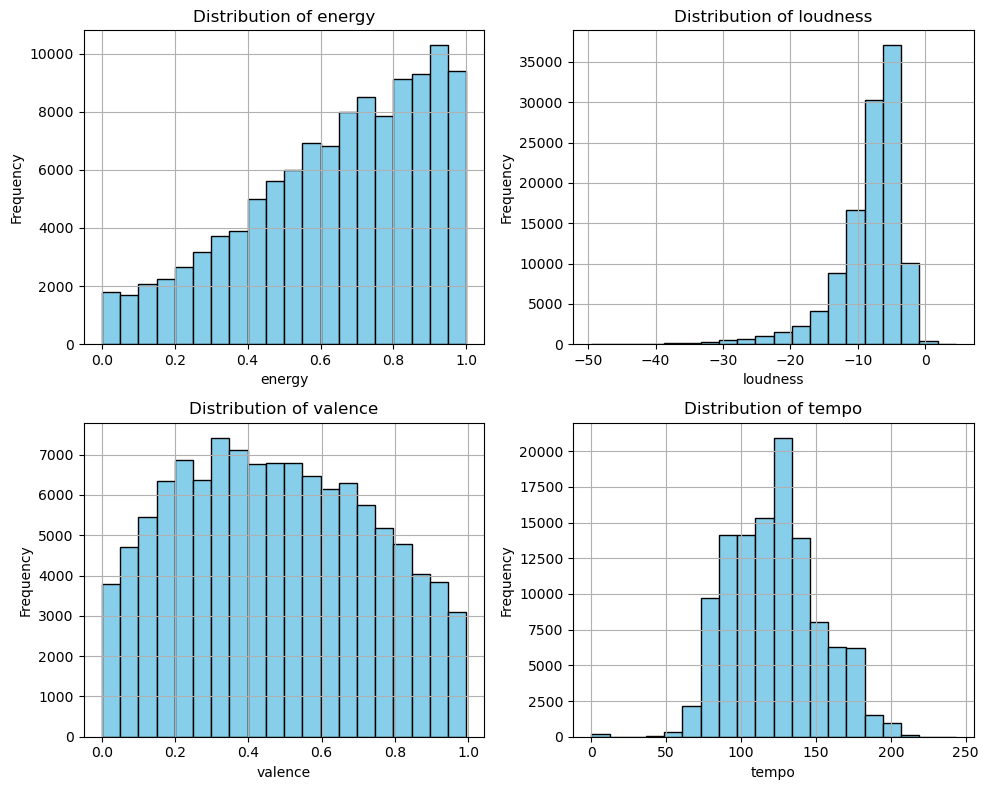

In [9]:
#checking the distribution of the variables
# Define the numerical continuous variables
continuous_vars = ['energy', 'loudness', 'valence', 'tempo']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot histograms for each variable
for i, var in enumerate(continuous_vars):
    axes[i].hist(df[var], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)
    
# Adjust layout
plt.tight_layout()
plt.show()

The histograms illustrate the distributions of four audio features: energy, loudness, valence, and tempo.

Energy:

Slightly left-skewed distribution with more high-energy tracks.
Indicates a prevalence of energetic tracks, possibly suitable for dance playlists.
Loudness:

Left-skewed distribution with most tracks having high loudness levels.
Typical of modern music, which is often mastered to be loud.
Valence:

Balanced distribution, indicating a diverse range of moods from sad to happy.
Tempo:

Central peak around 120 BPM with a wide distribution.
Reflects various music styles, from slower tempos to faster ones, suitable for different genres.

## Correlation Matrix

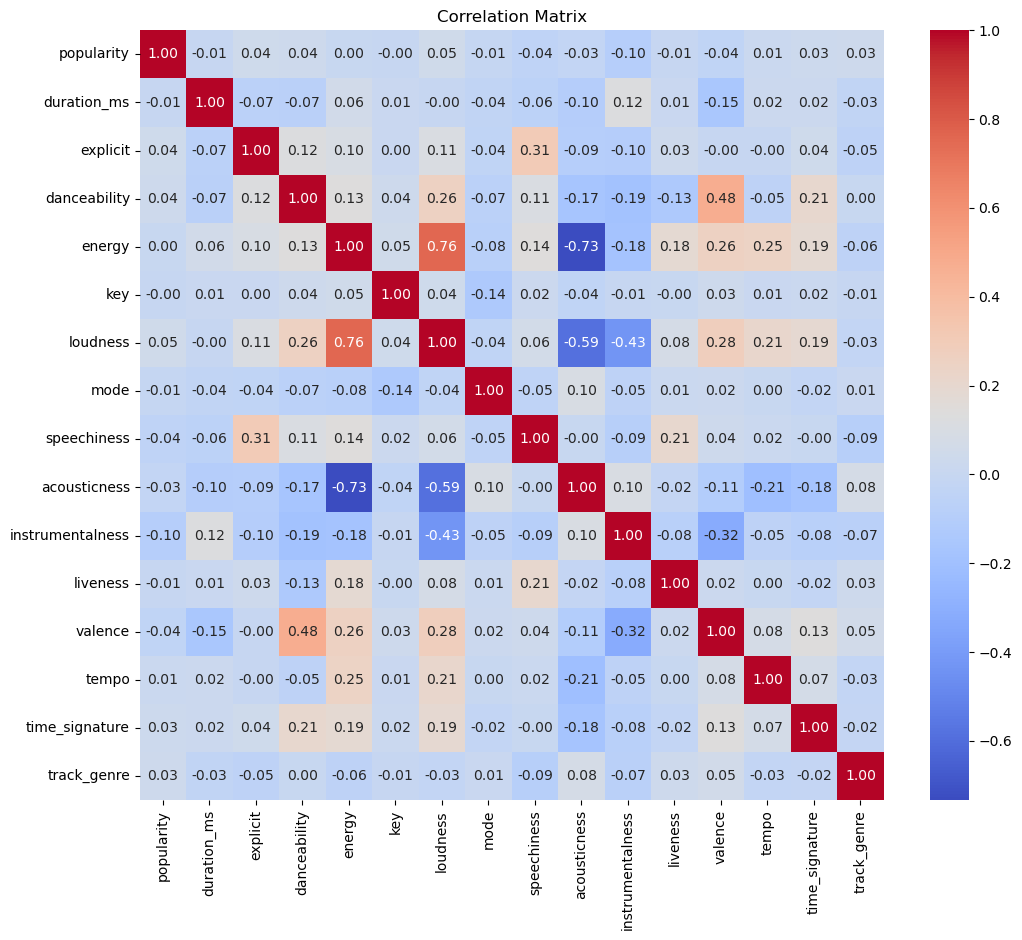

In [10]:
# Adjust the list of non-numeric column names
non_numeric_cols = ['Sr_no', 'track_id', 'artists', 'album_name', 'track_name']

# Drop non-numeric columns
df_numeric = df.drop(non_numeric_cols, axis=1)

# Handle missing values
df_numeric = df_numeric.dropna()


# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation matrix provides insights into relationships between music track features:

Strong positive correlation: Energy and Loudness (0.76)
Moderate positive correlation: Danceability and Valence (0.48)
Strong negative correlations: Acousticness and Energy (-0.73), Acousticness and Loudness (-0.59)
Moderate negative correlation: Valence and Acousticness (-0.32)

In [11]:
# Select and scale the relevant features identified from the correlation above
features = df_numeric[['energy', 'loudness', 'valence', 'tempo']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [12]:
# Apply K-means clustering to form clusters for low, medium and high energy workout music
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\welcome\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
# Optionally, examine cluster centers to label them
cluster_centers = kmeans.cluster_centers_

In [14]:
df['cluster'].value_counts()

cluster
1    46228
2    41448
0    26323
Name: count, dtype: int64

The dataset has been clustered into three groups, with the following counts in each cluster:

Cluster 1: 46,228

Cluster 2: 41,448

Cluster 0: 26,323

These clusters represent different intensity levels or characteristics of workout tracks based on the specified audio features.

In [15]:
intensity_labels = ['low', 'mid', 'high']  
df['workout_intensity'] = df['cluster'].apply(lambda x: intensity_labels[x])

In [16]:
df['workout_intensity'].value_counts()

workout_intensity
mid     46228
high    41448
low     26323
Name: count, dtype: int64

Here we are categorising the clusters to low mid and high

In [17]:
# Apply PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

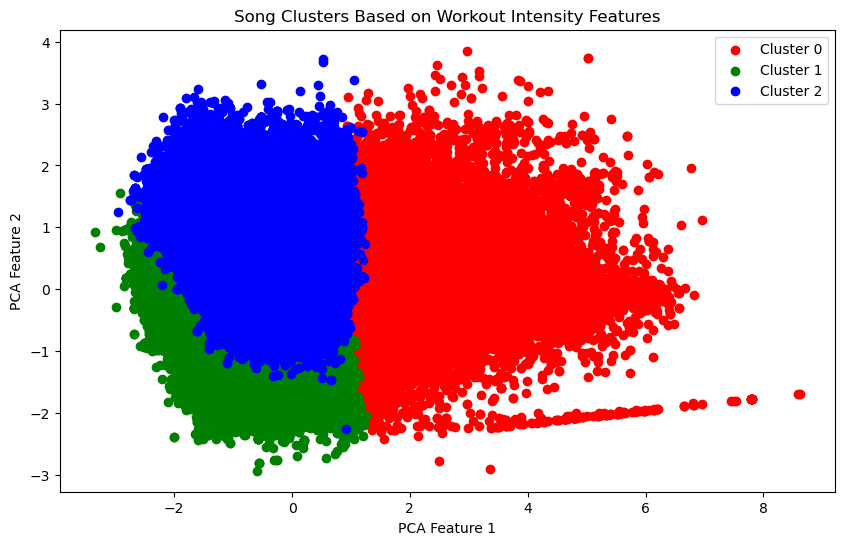

In [18]:
# Plot the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.scatter(reduced_features[df['cluster'] == i, 0], reduced_features[df['cluster'] == i, 1], color=color, label=f'Cluster {i}')
plt.title('Song Clusters Based on Workout Intensity Features')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

The scatter plot depicts clustered data points categorized into three groups based on workout intensity features. Colors represent 'high', 'mid', and 'low' intensity clusters. Principal Component Analysis (PCA) was used for dimensionality reduction. The plot aids in tailoring workout playlists to different intensity levels, enhancing the fitness-oriented music experience.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Sr_no              113999 non-null  int64  
 1   track_id           113999 non-null  object 
 2   artists            113999 non-null  object 
 3   album_name         113999 non-null  object 
 4   track_name         113999 non-null  object 
 5   popularity         113999 non-null  int64  
 6   duration_ms        113999 non-null  int64  
 7   explicit           113999 non-null  int64  
 8   danceability       113999 non-null  float64
 9   energy             113999 non-null  float64
 10  key                113999 non-null  int64  
 11  loudness           113999 non-null  float64
 12  mode               113999 non-null  int64  
 13  speechiness        113999 non-null  float64
 14  acousticness       113999 non-null  float64
 15  instrumentalness   113999 non-null  float64
 16  livenes

We have introduced a new column to categorize the intensity level of each song, allowing us to classify them into low, medium, and high-intensity workout music categories.


## Model Building

Random Forest Classifier Accuracy: 0.9890350877192983
Gradient Boosting Classifier Accuracy: 0.9883333333333333
XGBoost Classifier Accuracy: 0.9931798245614035


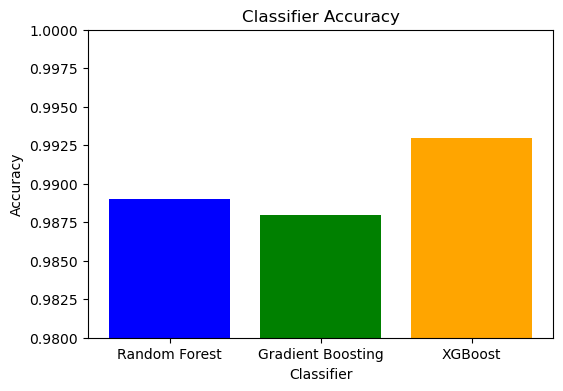

In [20]:
# Define features and target variable
X = df[['danceability', 'energy', 'loudness', 'tempo', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence']]
y = df['cluster']  # Assuming 'cluster' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict with Random Forest Classifier
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict with Gradient Boosting Classifier
gb_pred = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

# Train XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Predict with XGBoost Classifier
xgb_pred = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Compare the accuracies of all models
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)
print("XGBoost Classifier Accuracy:", xgb_accuracy)
import matplotlib.pyplot as plt

# Classifier names
classifiers = ['Random Forest', 'Gradient Boosting', 'XGBoost']

# Accuracy scores
accuracy_scores = [0.989, 0.988, 0.993]

# Plotting the histogram
plt.figure(figsize=(6, 4))
plt.bar(classifiers, accuracy_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy')
plt.ylim(0.98, 1)  # Set y-axis limits
plt.show()


All three classifiers - Random Forest, Gradient Boosting, and XGBoost - demonstrate exceptional performance on the test set, achieving accuracies ranging from approximately 98.83% to 99.32%.

When selecting the best model, consider factors such as model complexity, training time, interpretability, and potential overfitting.

Random Forest offers simplicity and interpretability, while XGBoost provide higher predictive accuracy at the expense of model complexity.

Exploring additional evaluation metrics like precision, recall, or F1-score can provide a more comprehensive understanding of each model's performance, particularly in scenarios with imbalanced datasets or costly misclassifications.

## Checking the F1 scores for the models

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute precision, recall, and F1-score for Random Forest Classifier
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

# Compute precision, recall, and F1-score for Gradient Boosting Classifier
gb_precision = precision_score(y_test, gb_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')

# Compute precision, recall, and F1-score for XGBoost Classifier
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print evaluation metrics for all classifiers
print("Random Forest Classifier:")
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print()

print("Gradient Boosting Classifier:")
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1-score:", gb_f1)
print()

print("XGBoost Classifier:")
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1-score:", xgb_f1)

Random Forest Classifier:
Precision: 0.9890340861091786
Recall: 0.9890350877192983
F1-score: 0.9890331339968476

Gradient Boosting Classifier:
Precision: 0.9883415122789473
Recall: 0.9883333333333333
F1-score: 0.9883291118050811

XGBoost Classifier:
Precision: 0.9931791927372768
Recall: 0.9931798245614035
F1-score: 0.993179170765938


The output provides evaluation metrics for three classification models: Random Forest Classifier, Gradient Boosting Classifier, and XGBoost Classifier.

Precision: Measures the accuracy of positive predictions.
Recall: Measures the ability to correctly identify positive instances.
F1-score: Balances precision and recall, providing a single performance metric.
Higher values indicate better performance.

## Validating the Model

In [22]:
# Define classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Perform cross-validation for Random Forest Classifier
rf_cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

# Perform cross-validation for Gradient Boosting Classifier
gb_cv_scores = cross_val_score(gb_classifier, X, y, cv=5, scoring='accuracy')

# Perform cross-validation for XGBoost Classifier
xgb_cv_scores = cross_val_score(xgb_classifier, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Random Forest Classifier Cross-Validation Scores:", rf_cv_scores)
print("Mean CV Accuracy:", rf_cv_scores.mean())
print()

print("Gradient Boosting Classifier Cross-Validation Scores:", gb_cv_scores)
print("Mean CV Accuracy:", gb_cv_scores.mean())
print()

print("XGBoost Classifier Cross-Validation Scores:", xgb_cv_scores)
print("Mean CV Accuracy:", xgb_cv_scores.mean())


Random Forest Classifier Cross-Validation Scores: [0.98350877 0.98171053 0.98960526 0.99004386 0.98407825]
Mean CV Accuracy: 0.9857893340197285

Gradient Boosting Classifier Cross-Validation Scores: [0.98548246 0.9827193  0.98627193 0.98811404 0.98263082]
Mean CV Accuracy: 0.9850437072878696

XGBoost Classifier Cross-Validation Scores: [0.99052632 0.98995614 0.99337719 0.99381579 0.9893855 ]
Mean CV Accuracy: 0.9914121875920998


The output provides cross-validation scores for three classification models: Random Forest Classifier, Gradient Boosting Classifier, and XGBoost Classifier.

Cross-validation scores represent the accuracy of each model across different folds of the dataset.
Mean CV Accuracy is the average accuracy of each model across all folds.
Higher scores indicate better performance.
These scores can be used to compare models and select the one with the highest mean accuracy.

## Storing the model

In [23]:
import pickle

# Store Random Forest Classifier
with open('random_forest_classifier.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

# Store Gradient Boosting Classifier
with open('gradient_boosting_classifier.pkl', 'wb') as file:
    pickle.dump(gb_classifier, file)

# Store XGBoost Classifier
with open('xgboost_classifier.pkl', 'wb') as file:
    pickle.dump(xgb_classifier, file)

Explanation:

The code uses the pickle.dump() function to serialize and store the trained classifiers into separate pickle files.
The with open(...) statement ensures proper file handling, automatically closing the file after writing.

## Insights

The process of clustering songs based on workout intensity features and training classification models for music recommendation can provide significant business value in various ways:

Personalized Music Recommendations: By clustering songs based on workout intensity features, the platform can offer personalized workout playlists tailored to each user's preferred intensity level. This enhances the user experience by providing music that matches their workout intensity, leading to higher engagement and satisfaction.

Improved User Engagement: With personalized recommendations, users are more likely to spend more time on the platform, leading to increased user engagement and retention. By providing curated playlists that align with users' workout preferences, the platform can foster a stronger connection with its users.

Enhanced Premium Subscriptions: Tailored music recommendations based on workout intensity can be offered as a premium feature, incentivizing users to upgrade to premium subscriptions. This creates additional revenue streams for the platform and increases the overall value proposition for users.

Data-Driven Insights for Content Curation: The clustering and classification models generate valuable insights into user preferences for workout music. By analyzing user interactions with different playlists and songs, the platform can gain insights into trends and preferences, informing content curation strategies and future music recommendations.

Partnerships and Collaborations: With a robust recommendation system in place, the platform can explore partnerships and collaborations with fitness brands, gyms, and wellness organizations. By offering customized music solutions for fitness programs and events, the platform can expand its reach and generate additional revenue streams through partnerships.

To maximize the business value of the code and models:

Continuously refine and optimize the clustering and classification algorithms to improve the accuracy and relevance of music recommendations.
Leverage user feedback and engagement data to iteratively enhance the recommendation system and adapt to evolving user preferences.
Explore additional features and data sources, such as user demographics, music genres, and mood preferences, to further personalize music recommendations and cater to a diverse user base.
Monitor key performance metrics, such as user engagement, retention, and subscription conversion rates, to assess the effectiveness of the recommendation system and make data-driven decisions for future enhancements.